In [1]:
import spacy

In [2]:
nlp = spanlp = spacy.load("en_core_web_sm")

## Cleaning for Context Paragraphs

### Train context

In [6]:
import pandas as pd

In [7]:
file_name_train =  'data/train_context.xlsx'

train_context = pd.read_excel(io=file_name_train)
train_context.head()

,Unnamed: 0,context,contextID
0,0,An Internet service provider (ISP) is an organ...,1
1,0,Internet services typically provided by ISPs i...,2
2,0,The Internet was developed as a network betwee...,3
3,0,"In 1989, the first ISPs were established in Au...",4
4,0,"On 23 April 2014, the U.S. Federal Communicati...",5


In [9]:
train_context.count()

Unnamed: 0    14963
context       14963
contextID     14963
dtype: int64

### Test Context

In [8]:
file_name_test =  'data/test_context.xlsx'
test_context = pd.read_excel(io=file_name_test)
test_context.head()

,Unnamed: 0,context,contextID
0,0,Pain is a distressing feeling often caused by ...,14964
1,0,Pain is the most common reason for physician c...,14965
2,0,"In 1994, responding to the need for a more use...",14966
3,0,"Pain is usually transitory, lasting only until...",14967
4,0,Nociceptive pain is caused by stimulation of p...,14968


In [11]:
test_context.count()

Unnamed: 0    4072
context       4072
contextID     4072
dtype: int64

In [13]:
train_context["Length"] = train_context["context"].apply(lambda x : len(x.split()))
test_context["Length"] = test_context["context"].apply(lambda x : len(x.split()))

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

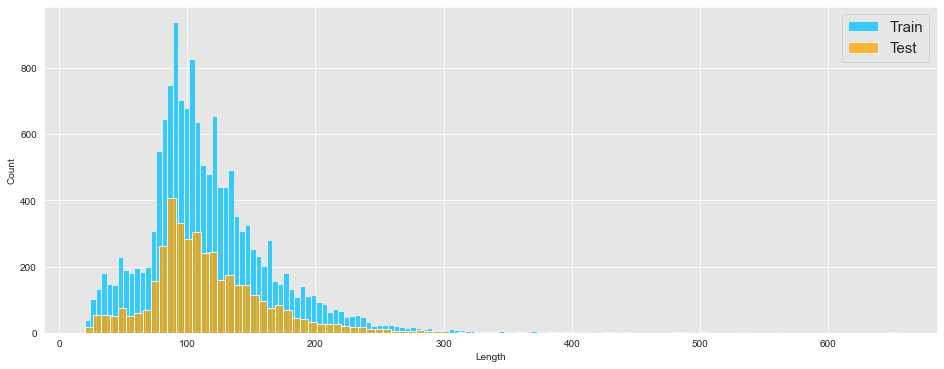

In [35]:
plt.figure(figsize=(16, 6))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.histplot(train_context["Length"], stat = "count", color='deepskyblue', label = "Train")
sns.histplot(test_context["Length"], stat = "count", color='Orange', label = "Test")
plt.legend(fontsize = 15)

In [19]:
train_context["Length"].describe()

count    14963.000000
mean       116.558377
std         49.786171
min         20.000000
25%         86.000000
50%        107.000000
75%        139.000000
max        562.000000
Name: Length, dtype: float64

In [20]:
test_context["Length"].describe()

count    4072.000000
mean      116.685167
std        49.247440
min        20.000000
25%        87.000000
50%       107.000000
75%       139.000000
max       653.000000
Name: Length, dtype: float64

### Basic Sentiment Analysis using AFINN

In [21]:
from afinn import Afinn

In [22]:
afinn = Afinn()
train_afinn_scores = train_context["context"].apply(lambda x: afinn.score(x))
test_afinn_scores = test_context["context"].apply(lambda x: afinn.score(x))

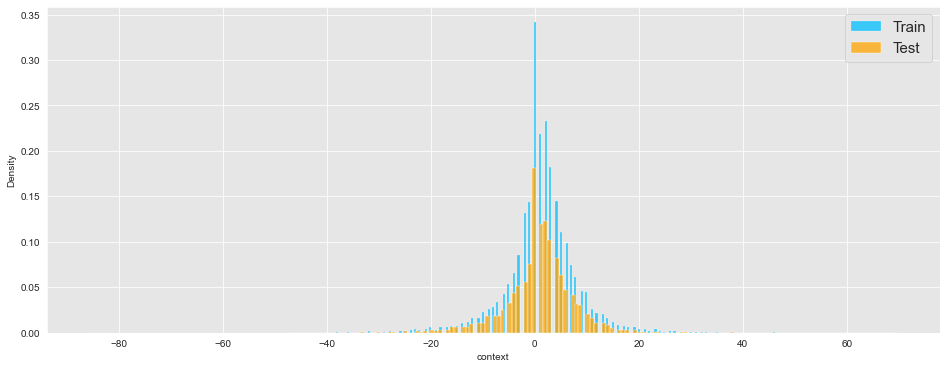

In [34]:
plt.figure(figsize=(16, 6))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.histplot(train_afinn_scores, stat = "density", color='deepskyblue', label = "Train")
sns.histplot(test_afinn_scores, stat = "density", color='orange', label = "Test")
plt.legend(fontsize = 15)

## EDA for Questions and Answers

In [36]:
train_QA = pd.read_excel(io='data/train_QA.xlsx')
test_QA = pd.read_excel(io='data/test_QA.xlsx')

In [37]:
train_QA.describe()

,Unnamed: 0,contextID
count,103526.000000,103526.000000
mean,3.675367,7364.695622
std,3.067723,4326.179747
min,0.000000,1.000000
25%,1.000000,3589.000000
50%,3.000000,7317.000000
75%,6.000000,11039.000000
max,29.000000,14963.000000
